Pour lancer l'environnement virtuel: source env0/bin/activate

## Introduction et Génération du Dataset
Dans cette section, nous générons un jeu de données simulant les caractéristiques de différentes plantes. Chaque plante est décrite par deux attributs : la largeur (x1) et la longueur (x2) de ses feuilles. Nous utilisons `make_blobs` de sklearn pour créer un Dataset de 100 instances avec ces deux caractéristiques. Notre objectif est d'entraîner un neurone artificiel pour classer les plantes en deux catégories : toxiques (y = 1) et non toxiques (y = 0).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions de X: (100, 2)
dimensions de y: (100, 1)


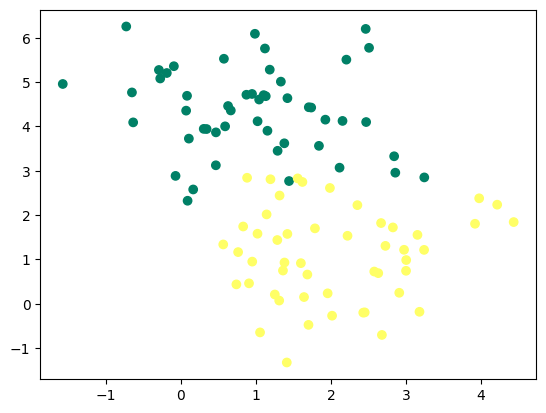

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

## Fonction d'Initialisation
La fonction `initialisation` est cruciale car elle définit les paramètres initiaux du modèle, à savoir les poids `W` et le biais `b`. Ces paramètres seront ajustés au cours de l'entraînement. L'initialisation aléatoire est une étape commune dans les algorithmes d'apprentissage automatique.


In [3]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

## Modèle du Neurone Artificiel
La fonction `model` représente notre neurone artificiel. Elle calcule la sortie `A` en appliquant d'abord une fonction linéaire (Z = XW + b), puis une fonction d'activation sigmoïde (A = 1/(1 + e⁻z)). La fonction sigmoïde est choisie pour sa capacité à mapper les valeurs d'entrée entre 0 et 1, ce qui est idéal pour notre problème de classification binaire.


In [4]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))
  return A

## Fonction de Coût et Calcul des Gradients
La `log_loss` est la fonction de coût utilisée pour évaluer les performances du modèle. Elle mesure l'écart entre les prédictions et les vraies valeurs. Les gradients calculés par la fonction `gradients` sont essentiels pour l'optimisation des paramètres du modèle via la descente de gradient.


In [5]:
def log_loss(A, y):
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


In [6]:
def gradients(A, X, y):
  dW = 1 / len(y) * np.dot(X.T, A - y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

## Mise à jour des Paramètres
La fonction `update` ajuste les paramètres `W` et `b` en fonction des gradients calculés. Le `learning_rate` contrôle l'ampleur de la mise à jour. Une valeur trop élevée peut conduire à un apprentissage instable, tandis qu'une valeur trop faible peut ralentir le processus d'apprentissage.


In [7]:
def update(dW, db, W, b, learning_rate): 
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

## Prédiction et Évaluation
La fonction `predict` utilise le modèle entraîné pour prédire la catégorie d'une plante. L'`accuracy_score` évalue la précision du modèle en comparant les prédictions aux vraies valeurs. Cette métrique est cruciale pour comprendre l'efficacité de notre modèle.


In [8]:
def predict(X, W, b):
  A = model(X, W, b)
  print(A)
  return A >= 0.5

In [9]:
from sklearn.metrics import accuracy_score

## Entraînement du Neurone Artificiel et Visualisation
La fonction `artificial_neuron` encapsule le processus d'entraînement de notre neurone artificiel. Elle initialise les paramètres, effectue la descente de gradient et trace la courbe de perte. La visualisation finale montre la frontière de décision du modèle, aidant à visualiser sa capacité à séparer les deux catégories de plantes.


In [10]:
def artificial_neuron(X, y, learning_rate = 0.1 , n_iteration = 100):
  #initialisation W, b
  W, b = initialisation(X)

  Loss = []

  for i in range(n_iteration):
    A = model(X, W, b)
    Loss.append(log_loss(A, y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)

  y_pred = predict(X, W, b)
  print(accuracy_score(y, y_pred))
    
  plt.plot(Loss)
  plt.show()
  
  return (W, b)

[[0.95733509]
 [0.73782249]
 [0.00810408]
 [0.1528234 ]
 [0.95172377]
 [0.3562992 ]
 [0.08456384]
 [0.93675844]
 [0.0591352 ]
 [0.84204757]
 [0.04043735]
 [0.85003587]
 [0.03473805]
 [0.02396113]
 [0.69850773]
 [0.97687318]
 [0.98615774]
 [0.04571707]
 [0.70360673]
 [0.6271111 ]
 [0.05704808]
 [0.04618454]
 [0.39672197]
 [0.0079518 ]
 [0.93659753]
 [0.04177786]
 [0.86687703]
 [0.0129134 ]
 [0.0808714 ]
 [0.72738756]
 [0.96846044]
 [0.05556036]
 [0.64765407]
 [0.96895484]
 [0.40924607]
 [0.25174494]
 [0.75431349]
 [0.54627705]
 [0.47225713]
 [0.44752388]
 [0.08009408]
 [0.09251305]
 [0.00155355]
 [0.18390505]
 [0.21330845]
 [0.8177558 ]
 [0.95321497]
 [0.9455239 ]
 [0.00714033]
 [0.01386555]
 [0.92106138]
 [0.54589231]
 [0.06018832]
 [0.05251588]
 [0.80193784]
 [0.05414652]
 [0.70089843]
 [0.80005608]
 [0.93542362]
 [0.9851896 ]
 [0.63193721]
 [0.20111215]
 [0.0076366 ]
 [0.90903883]
 [0.02060068]
 [0.37353548]
 [0.04507795]
 [0.61639455]
 [0.92769103]
 [0.28814054]
 [0.19336702]
 [0.89

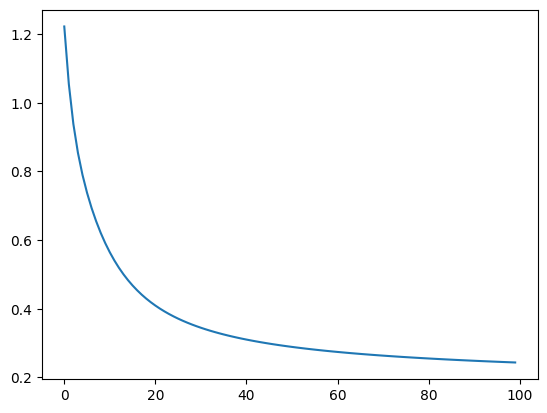

In [11]:
W, b = artificial_neuron(X, y)

## Test avec une Nouvelle Instance
Ici, nous testons notre modèle avec une nouvelle instance de plante pour voir comment elle est classifiée. Cette étape est essentielle pour vérifier la capacité du modèle à généraliser ses apprentissages à de nouvelles données.


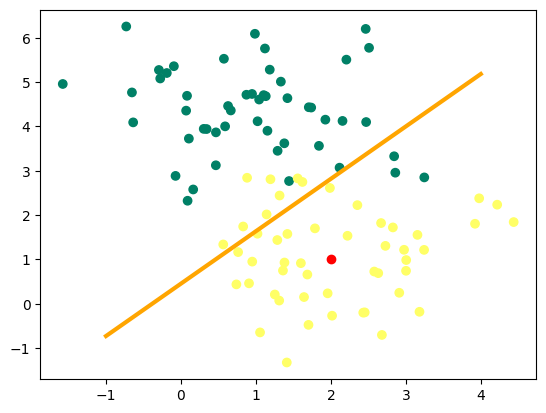

[0.85363955]


array([ True])

In [12]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 -b ) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()
predict(new_plant, W, b)